In [10]:
!python3.9 -m pip install -r requirements.txt

In [15]:
!echo "matplotlib==3.5.2" >> requirements.txt

In [14]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [19]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

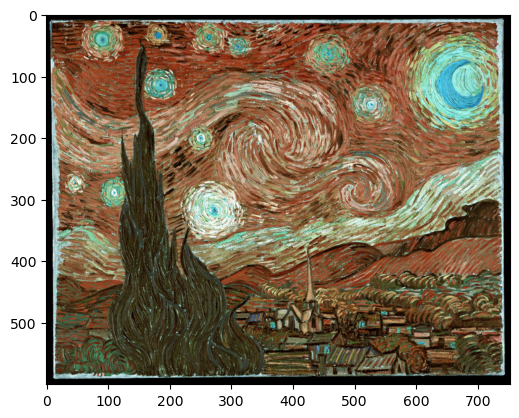

In [23]:
source_image = cv.imread("images/starry_night.jpg")
plt.imshow(source_image)
plt.show()

## Задание 1

Написать свой скрипт, который переводит изображение из формата `BGR` в `RGB` (аналог библиотечной функции `cv.cvtColor(img_bgr, cv.COLOR_BGR2RGB)`). Для проверки используйте изображение `starry_night.jpg`

In [12]:
def convertToBgr2Rgb(image: np.ndarray) -> np.ndarray:
    if len(image.shape) != 3 and image.shape[-1] != 3:
        raise Exception("Image is not RGB")
    return image[:, :, ::-1]

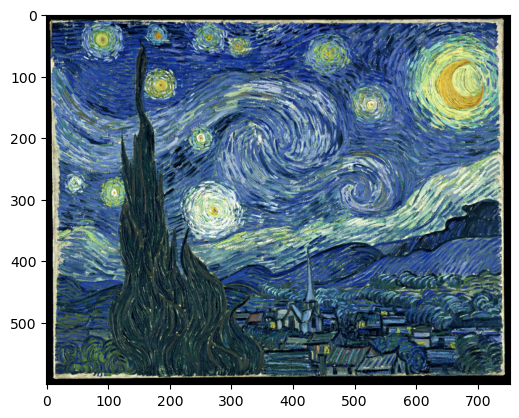

In [24]:
RGB_image = convertToBgr2Rgb(source_image)
plt.imshow(RGB_image)
plt.show()

## Задание 2

Написать скрипт, который меняет местами луну и голубую воронку (в самом центре) на изображении `starry_night.jpg`.

In [31]:
from typing import Tuple

In [32]:
def get_bbox_shape(bbox: Tuple[int, int, int, int]) -> Tuple[int, int]:
    return bbox[2] - bbox[0], bbox[3] - bbox[1]

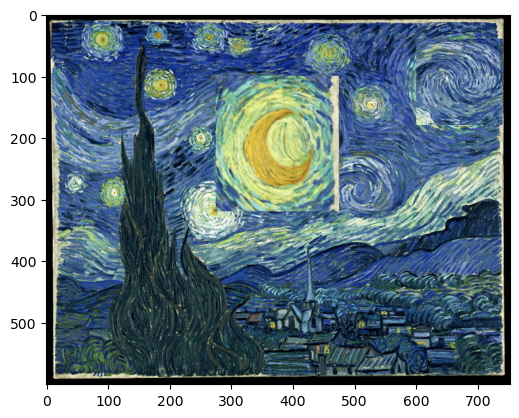

In [35]:
result_image = source_image.copy()

bbox_moon = (
    275, 100,
    475, 320
)
bbox_moon_shape = get_bbox_shape(bbox_moon)

bbox_center = (
    600, 40,
    740, 180
)
bbox_center_shape = get_bbox_shape(bbox_center)

# Make moon & center crops
crop_moon   = source_image[bbox_moon[1]:bbox_moon[3], bbox_moon[0]:bbox_moon[2], :]
crop_center = source_image[bbox_center[1]:bbox_center[3], bbox_center[0]:bbox_center[2], :]

# Resize crops
crop_moon   = cv.resize(crop_moon, bbox_center_shape)
crop_center = cv.resize(crop_center, bbox_moon_shape)

# Insert crops into result image
result_image[bbox_moon[1]:bbox_moon[3], bbox_moon[0]:bbox_moon[2], :]         = crop_center
result_image[bbox_center[1]:bbox_center[3], bbox_center[0]:bbox_center[2], :] = crop_moon

plt.imshow(result_image[:, :, ::-1])
plt.show()

## Задание 3

Попробуйте превратить "starry_night" в "starry_day" путем увеличения яркости изображения и смены темно-синих тонов на светло-желтые. Как это сделать? См. подсказку по смешиванию RGB цветов в файле `color_blending.gif`. Замечание: при проведении экспериментов с матрицами каналов, обратите внимание на `dtype` этих матриц (стандартный тип uint8 не позволит вам выйти за границы диапазона `0 ... 255`, и поэтому может быть причиной появления не тех результатов, которые вы ожидаете, поэтому перед проведением операций целесообразно этот тип сменить на более подходящий).

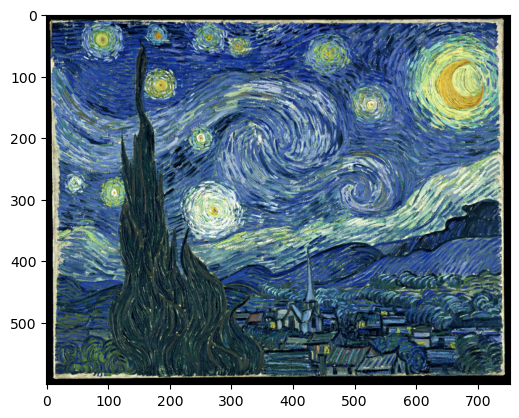

In [44]:
image = cv.imread("images/starry_night.jpg")
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

plt.imshow(image)
plt.show()

Представлю несколько вариантов с разным коэффициентом масштабирования цвета

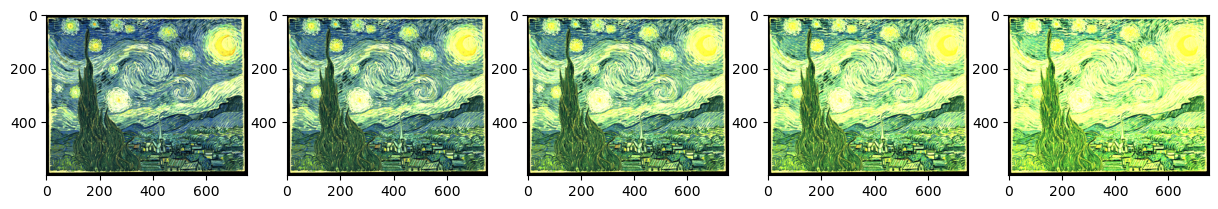

In [56]:
coeffs = [0.7, 0.6, 0.5, 0.4, 0.3]

fig, ax = plt.subplots(figsize=(15, 10), ncols=len(coeffs))

for i, coef in enumerate(coeffs):
    result = image.copy()
    result[:, :, 2] = result[:, :, 2] * coef
    cv.convertScaleAbs(result, result, 1 / coef, 0)
    ax[i].imshow(result)